In [52]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd

import os
from os import path
import numpy as np
from PIL import Image

In [12]:
tipo_vac_raw = pd.read_csv('../dados/tipo_vacina_por_regiao_1994_2019.csv', sep = ';', encoding = 'ISO-8859-1', skiprows = 3,
                            skipfooter = 20, thousands = '.', decimal = ',', engine = 'python')

In [13]:
tipo_vac_raw

,Imuno,1 Região Norte,2 Região Nordeste,3 Região Sudeste,4 Região Sul,5 Região Centro-Oeste,Total
0,072 BCG,8934021,25716922,30399265,10320185,6313847,81684240
1,099 Hepatite B em crianças até 30 dias,1483708,3962859,5634362,1747004,1240004,14067937
2,061 Rotavírus Humano,3057558,9398436,13678966,4524124,2732897,33391981
3,053 Meningococo C,2247567,6782535,10032410,3310188,2018426,24391126
4,073 Hepatite B,6211709,17317816,23733605,8632675,4667998,60563803
5,080 Penta,1722959,5031649,7338378,2507602,1550119,18150707
6,012 Pneumocócica,2146967,6492464,9682534,3286952,1966212,23575129
7,074 Poliomielite,7274884,22142316,28092416,9575853,5616541,72702010
8,100 Poliomielite 4 anos,309,3310,7428,2034,768,13849
9,006 Febre Amarela,6503172,7788790,7694629,2695171,4285684,28967446


In [14]:
vacs = tipo_vac_raw.copy()

In [15]:
vacs['Imuno'] = vacs['Imuno'].str[4:]

In [17]:
vacinas_nospace = [str(word).replace(' ', '_') for word in vacs.Imuno]

In [19]:
vacs['Imuno'] = vacs['Imuno'].str.replace(' ', '_')

In [21]:
vacs = vacs[['Imuno', 'Total']]

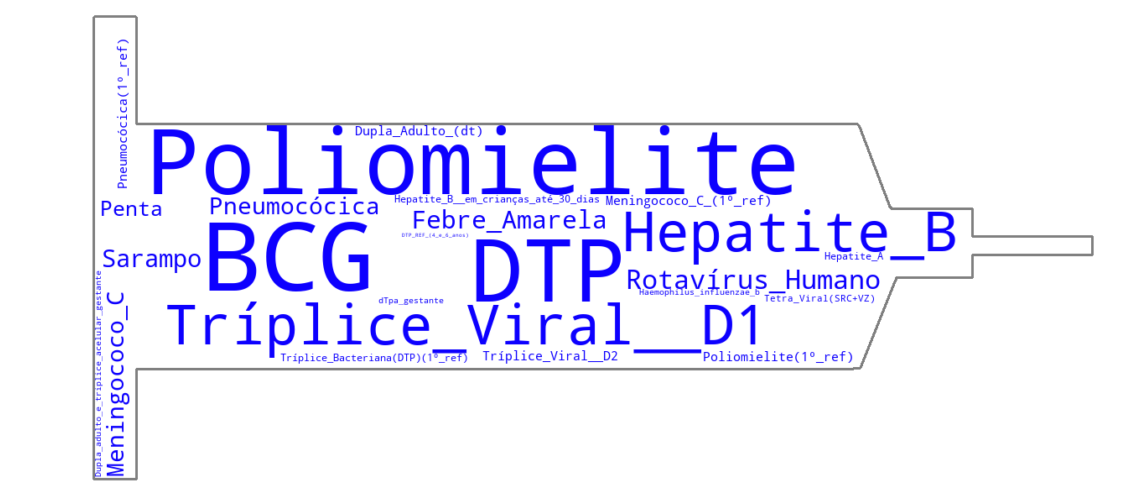

In [113]:
d = {}
for Imuno, Total in vacs.values:
    d[Imuno] = Total
    
def my_tf_color_func(word, **kwargs):
     return "hsl(%d243, 100%%, 50%%)" % (360 * d[word])


vaccine_mask = np.array(Image.open('vacina.png'))
    
wordcloud = WordCloud(background_color = 'white',
                      width = 1000,
                      height = 500,
                      mask = vaccine_mask,
                      contour_width = 3,
                      contour_color = 'grey',
                      color_func = my_tf_color_func)

wordcloud.generate_from_frequencies(frequencies = d)
plt.figure(figsize = (20, 15))
plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')
plt.show()




66279719